### 회귀평가지표

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_squared_log_error, root_mean_squared_log_error

true = np.array([1, 2, 3, 2, 3, 5, 4, 6, 5, 6, 7, 8, 8]) # 실젯값
preds = np.array([1, 1, 2, 2, 3, 4, 4, 5, 5, 7, 7, 6, 8]) # 예측값

mse=mean_squared_error(true, preds)
print(mse)

msle=mean_squared_log_error(true, preds)
print(msle)

ImportError: cannot import name 'root_mean_squared_log_error' from 'sklearn.metrics' (C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_squared_log_error

true = np.array([1, 2, 3, 2, 3, 5, 4, 6, 5, 6, 7, 8, 8]) # 실젯값
preds = np.array([1, 1, 2, 2, 3, 4, 4, 5, 5, 7, 7, 6, 8]) # 예측값

mse=mean_squared_error(true, preds)
print(mse)

msle=mean_squared_log_error(true, preds)
print(msle)

0.6923076923076923
0.02962739119574596


In [11]:
import sklearn
print(sklearn.__version__)

1.0.2


In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_squared_log_error

true = np.array([1, 2, 3, 2, 3, 5, 4, 6, 5, 6, 7, 8, 8]) # 실젯값
preds = np.array([1, 1, 2, 2, 3, 4, 4, 5, 5, 7, 7, 6, 8]) # 예측값

mse=mean_squared_error(true, preds)
print(mse)

msle=mean_squared_log_error(true, preds)
print(msle)

RMSLE = np.sqrt(mean_squared_log_error(true, preds))
print(RMSLE)

0.6923076923076923
0.02962739119574596
0.1721260909791016


In [3]:
import numpy as np
# MAE, MSE, MSLE, R2 임포트
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

true = np.array([1, 2, 3, 2, 3, 5, 4, 6, 5, 6, 7, 8, 8]) # 실젯값
preds = np.array([1, 1, 2, 2, 3, 4, 4, 5, 5, 7, 7, 6, 8]) # 예측값

MAE = mean_absolute_error(true, preds)
MSE = mean_squared_error(true, preds)
RMSE = np.sqrt(MSE)
MSLE = mean_squared_log_error(true, preds)
RMSLE = np.sqrt(mean_squared_log_error(true, preds))
R2 = r2_score(true, preds)

# 출력
print(f'MAE:\t {MAE:.4f}')
print(f'MSE:\t {MSE:.4f}')
print(f'RMSE:\t {RMSE:.4f}')
print(f'MSLE:\t {MSLE:.4f}')
print(f'RMSLE:\t {RMSLE:.4f}')
print(f'R2:\t {R2:.4f}')

MAE:	 0.5385
MSE:	 0.6923
RMSE:	 0.8321
MSLE:	 0.0296
RMSLE:	 0.1721
R2:	 0.8617


### 원핫인코딩

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
fruits = ['사과', '블루베리', '바나나', '귤', '블루베리', '바나나', '바나나', '사과']

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

fruits_label_encoder = label_encoder.fit_transform(fruits)
print(fruits_label_encoder)


fruits_onehot_encoder = onehot_encoder.fit_transform(fruits_label_encoder.reshape(-1,1))
print(fruits_onehot_encoder)
print('원-핫 인코딩 적용 후 데이터:\n', fruits_onehot_encoder.toarray())

[3 2 1 0 2 1 1 3]
  (0, 3)	1.0
  (1, 2)	1.0
  (2, 1)	1.0
  (3, 0)	1.0
  (4, 2)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 3)	1.0
원-핫 인코딩 적용 후 데이터:
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


### 피처스케일링

In [14]:
import pandas as pd

height_weight_dict = {'키': [1.7, 1.5, 1.8], '몸무게': [75, 55, 60]}
df = pd.DataFrame(height_weight_dict, index=['광일', '혜성', '덕수'])
df

,키,몸무게
광일,1.7,75
혜성,1.5,55
덕수,1.8,60


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
print(df_scaled)

ft=scaler.fit_transform(df)
print(ft)

[[0.66666667 1.        ]
 [0.         0.        ]
 [1.         0.25      ]]
[[0.66666667 1.        ]
 [0.         0.        ]
 [1.         0.25      ]]


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sd = scaler.fit_transform(df)
print(sd)

[[ 0.26726124  1.37281295]
 [-1.33630621 -0.98058068]
 [ 1.06904497 -0.39223227]]


### K 폴드 교차 검증

In [27]:
import numpy as np
from sklearn.model_selection import KFold

data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
data

folds = KFold(n_splits=5, shuffle=False)
for train_idx, valid_idx in folds.split(data):
    print(f'훈련 데이터: {data[train_idx]}, 검증 데이터: {data[valid_idx]}')


훈련 데이터: [2 3 4 5 6 7 8 9], 검증 데이터: [0 1]
훈련 데이터: [0 1 4 5 6 7 8 9], 검증 데이터: [2 3]
훈련 데이터: [0 1 2 3 6 7 8 9], 검증 데이터: [4 5]
훈련 데이터: [0 1 2 3 4 5 8 9], 검증 데이터: [6 7]
훈련 데이터: [0 1 2 3 4 5 6 7], 검증 데이터: [8 9]


In [28]:
folds = KFold(n_splits=5, shuffle=True)

for train_idx, valid_idx in folds.split(data):
    print(f'훈련 데이터: {data[train_idx]}, 검증 데이터: {data[valid_idx]}')

훈련 데이터: [0 1 2 3 4 5 7 8], 검증 데이터: [6 9]
훈련 데이터: [1 2 3 5 6 7 8 9], 검증 데이터: [0 4]
훈련 데이터: [0 1 2 4 5 6 7 9], 검증 데이터: [3 8]
훈련 데이터: [0 1 2 3 4 6 8 9], 검증 데이터: [5 7]
훈련 데이터: [0 3 4 5 6 7 8 9], 검증 데이터: [1 2]


In [29]:
y = np.array(['스팸']*5 + ['일반']*45)

folds = KFold(n_splits=5, shuffle=True) # K 폴드 교차 검증

for idx, (train_idx, valid_idx) in enumerate(folds.split(y)):
    print(f'Fold {idx+1} 검증 데이터 타깃값:')
    print(y[valid_idx], '\n')

Fold 1 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 2 검증 데이터 타깃값:
['일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 3 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 4 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 5 검증 데이터 타깃값:
['스팸' '스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



In [30]:
from sklearn.model_selection import StratifiedKFold

X = np.array(range(50))
y = np.array(['스팸']*5 + ['일반']*45)

folds = StratifiedKFold(n_splits=5) # '층화' K 폴드 교차 검증

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print(f'Fold {idx+1} 검증 데이터 타깃값:')
    print(y[valid_idx], '\n')

Fold 1 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 2 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 3 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 4 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 5 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



### 선형회귀모델

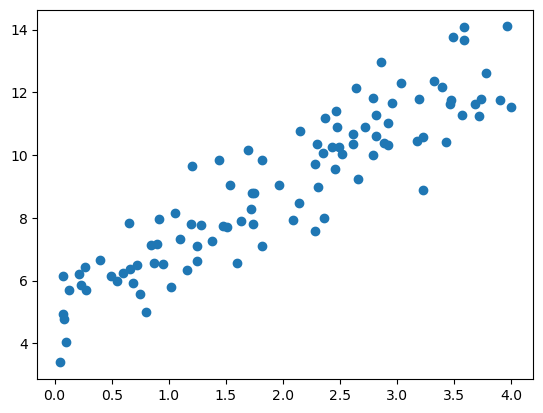

In [31]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0) # 시드값 고정

w0 = 5 # y절편
w1 = 2 # 회귀계수
noise = np.random.randn(100, 1) # 노이즈 ①

x = 4 * np.random.rand(100, 1) # 0~4 사이 실숫값 100개 생성 (x값) ②
y = w1*x + w0 + noise # y값

plt.scatter(x, y);

In [32]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression() # 선형 회귀 모델
linear_reg_model.fit(x, y) # 모델 훈련

print('y절편(w0):', linear_reg_model.intercept_) # ①
print('회귀계수(w1):', linear_reg_model.coef_) # ②

y절편(w0): [5.09772262]
회귀계수(w1): [[1.9808382]]


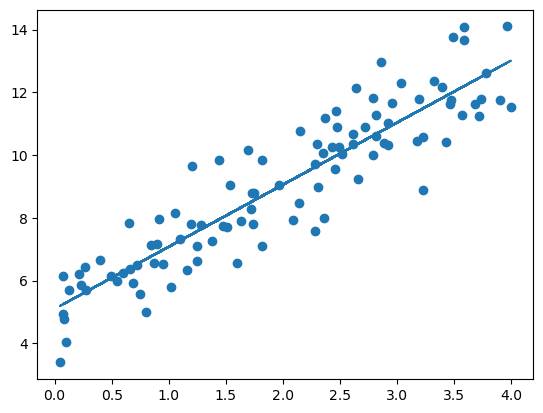

In [33]:
y_pred = linear_reg_model.predict(x) # 예측

plt.scatter(x, y)
plt.plot(x, y_pred); # 선형 회귀선 그리기

### 결정트리모델

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 유방암 데이터셋 불러오기
cancer_data = load_breast_cancer()

# 훈련, 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'], 
                                                    cancer_data['target'], 
                                                    stratify=cancer_data['target'], 
                                                    test_size=0.4, 
                                                    random_state=42)

decisiontree = DecisionTreeClassifier(random_state=42) # 결정 트리 정의
decisiontree.fit(X_train, y_train) # 모델 훈련
accuracy = decisiontree.score(X_test, y_test) # 정확도 측정
# 테스트 데이터를 활용하여 결정 트리 모델 정확도 출력
print(f'결정 트리 정확도: {accuracy:.3f}')

결정 트리 정확도: 0.930


### 랜덤포레스트

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 유방암 데이터셋 불러오기
cancer_data = load_breast_cancer()
# 훈련, 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'], 
                                                    cancer_data['target'],
                                                    stratify=cancer_data['target'], 
                                                    test_size=0.4, 
                                                    random_state=42)

randomforest = RandomForestClassifier(random_state=42) # 랜덤 포레스트 정의
randomforest.fit(X_train, y_train) # 모델 훈련

accuracy = randomforest.score(X_test, y_test) # 정확도 측정

# 테스트 데이터를 활용하여 랜덤 포레스트 모델 정확도 출력
print(f'랜덤 포레스트 정확도: {accuracy:.3f}')

랜덤 포레스트 정확도: 0.939


### 하아퍼파라미터 최적화(베이지안 최적화)

In [36]:
pip install bayesian-optimization

Note: you may need to restart the kernel to use updated packages.


In [37]:
# 하이퍼파라미터 범위(딕셔너리 형태)
param_bounds = {'x': (-1, 5), 
                'y': (0, 4)}

def eval_function(x, y):
    return -x ** 2 - (y - 2) ** 2 + 10

from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f=eval_function, pbounds=param_bounds, random_state=0)

optimizer.maximize(init_points=2, n_iter=10)

# 평가점수가 최대일 때 타깃, x, y값 출력
optimizer.max

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 1         | 4.002     | 2.293     | 2.861     |
| 2         | 3.121     | 2.617     | 2.18      |
| 3         | 3.832     | 2.327     | 2.869     |
| 4         | 4.596     | 2.171     | 2.832     |
| 5         | -6.227    | 3.989     | 2.559     |
| 6         | 9.467     | 0.3522    | 1.361     |
| 7         | 7.39      | -1.0      | 3.269     |
| 8         | 5.0       | -1.0      | 0.0       |
| 9         | 3.841     | 1.469     | 0.0       |
| 10        | 8.966     | -1.0      | 1.817     |
| 11        | 9.737     | 0.1806    | 2.48      |
| 12        | 5.785     | 0.4638    | 4.0       |


{'target': 9.737086794790834,
 'params': {'x': 0.180638373962717, 'y': 2.4798780918746672}}

# 자전거 대여

### 기본적 분석

In [44]:
import numpy as np
import pandas as pd # 판다스 임포트
# 데이터 경로
data_path = "./Bike-Sharing-Demand/"

train = pd.read_csv(data_path + 'train.csv') # 훈련 데이터
test = pd.read_csv(data_path + 'test.csv') # 테스트 데이터
submission = pd.read_csv(data_path + 'samplesubmission.csv') # 제출 샘플 데이터

In [45]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [46]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [47]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [48]:
submission.head()

,datetime,count
0,2011-01-20 0:00,0
1,2011-01-20 1:00,0
2,2011-01-20 2:00,0
3,2011-01-20 3:00,0
4,2011-01-20 4:00,0


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


### 효과적인 분석을 위한 피처 엔지니어링

In [51]:
print(train['datetime'][100]) # datetime 100번째 원소
print(train['datetime'][100].split()) # 공백 기준으로 문자열 나누기
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[1]) # 시간

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [52]:
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[0].split("-")) # "-" 기준으로 문자열 나누기
print(train['datetime'][100].split()[0].split("-")[0]) # 연도
print(train['datetime'][100].split()[0].split("-")[1]) # 월
print(train['datetime'][100].split()[0].split("-")[2]) # 일

2011-01-05
['2011', '01', '05']
2011
01
05


In [53]:
print(train['datetime'][100].split()[1]) # 시간
print(train['datetime'][100].split()[1].split(":")) # ":" 기준으로 문자열 나누기
print(train['datetime'][100].split()[1].split(":")[0]) # 시간
print(train['datetime'][100].split()[1].split(":")[1]) # 분
print(train['datetime'][100].split()[1].split(":")[2]) # 초

09:00:00
['09', '00', '00']
09
00
00


In [56]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0]) # 날짜 피처 생성

# 연도, 월, 일, 시, 분, 초 피처를 차례로 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])


#### apply(  ) 함수는 DataFrame의 데이터를 일괄 가공
#### 종종 람다lambda 함수와 함께 사용 
#### 람다 함수를 DataFrame 축(기본값은 DataFrame의 각 열column에 대해 수행)을 따라 적용하는 기능  

In [57]:
from datetime import datetime # datetime 라이브러리 임포트
import calendar

print(train['date'][100]) # 날짜
print(datetime.strptime(train['date'][100], '%Y-%m-%d')) # datetime 타입으로 변경
# 정수로 요일 반환
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())
# 문자열로 요일 반환
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').
weekday()])

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [58]:
train['weekday'] = train['date'].apply(
    lambda dateString: 
    calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

In [59]:
train['weekday']

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: weekday, Length: 10886, dtype: object

In [60]:
train['season'] = train['season'].map({ 1: 'Spring', 
                                        2: 'Summer', 
                                        3: 'Fall', 
                                        4: 'Winter' })
train['weather'] = train['weather'].map({1: 'Clear', 
                                   2: 'Mist, Few clouds', 
                                   3: 'Light Snow, Rain, Thunderstorm', 
                                   4: 'Heavy Rain, Thunderstorm, Snow, Fog'})

In [61]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


참고로 date 피처가 제공하는 정보는 모두 year, month, day 피처에도 있어서 추후 date 피처는 제거
또한 세 달씩‘월’을 묶으면 ‘계절’. 즉, 세분화된 month 피처를 세 달씩 묶으면 season 피처와 의미가 같아짐
지나치게 세분화된 피처를 더 큰 분류로 묶으면 성능이 좋아지는 경우가 있어 여기서는 season 피처만 남기고 month 피처는 제거

### 데이터 시각화

In [63]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

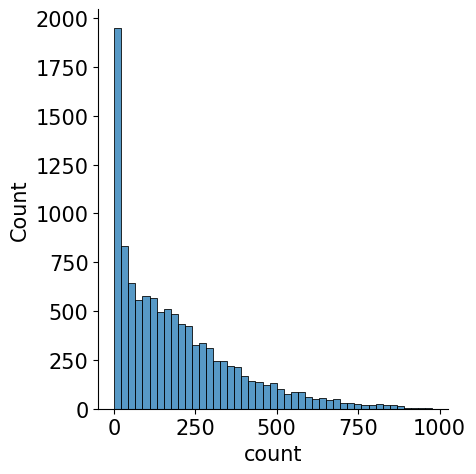

In [64]:
mpl.rc('font', size=15) # 폰트 크기를 15로 설정
sns.displot(train['count']); # 분포도 출력

회귀 모델이 좋은 성능을 내려면 데이터가 정규분포를 따라야 하는데, 현재 타깃값 count는 정규분포를 따르지 않습니다.
따라서 현재 타깃값을 그대로 사용해 모델링한다면 좋은 성능을 기대하기 어렵습니다.
데이터 분포를 정규분포에 가깝게 만들기 위해 가장 많이 사용하는 방법은 로그변환
로그변환은 count 분포와 같이 데이터가 왼쪽으로 편향되어 있을 때 사용

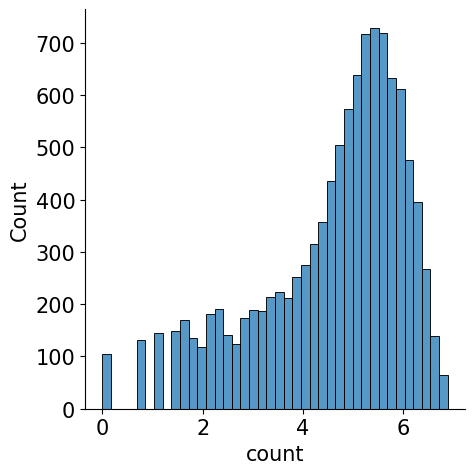

In [65]:
sns.displot(np.log(train['count']));

#### 막대그래프

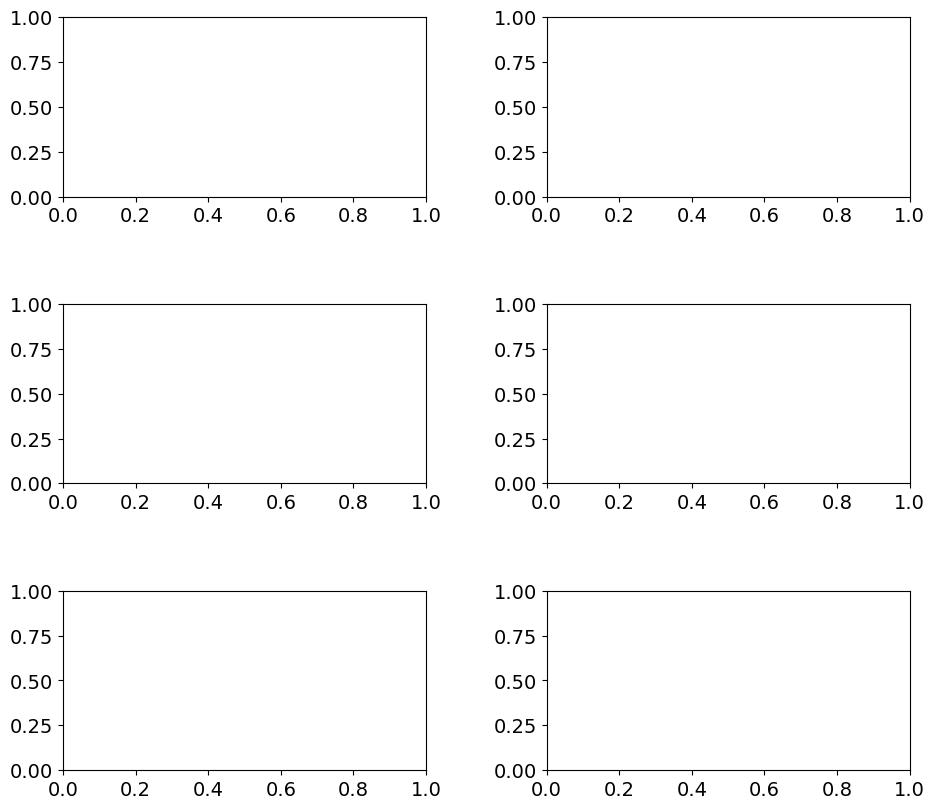

In [66]:
mpl.rc('font', size=14) # 폰트 크기 설정
mpl.rc('axes', titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성 ①
plt.tight_layout() # 그래프 사이에 여백 확보 ②
figure.set_size_inches(10, 9) # 전체 Figure 크기를 10x9인치로 설정 ③

In [67]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [68]:
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

<AxesSubplot:xlabel='second', ylabel='count'>

In [69]:
axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')
axes[2, 0].set(title='Rental amounts by minute')
axes[2, 1].set(title='Rental amounts by second')

[Text(0.5, 1.0, 'Rental amounts by second')]

In [70]:
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

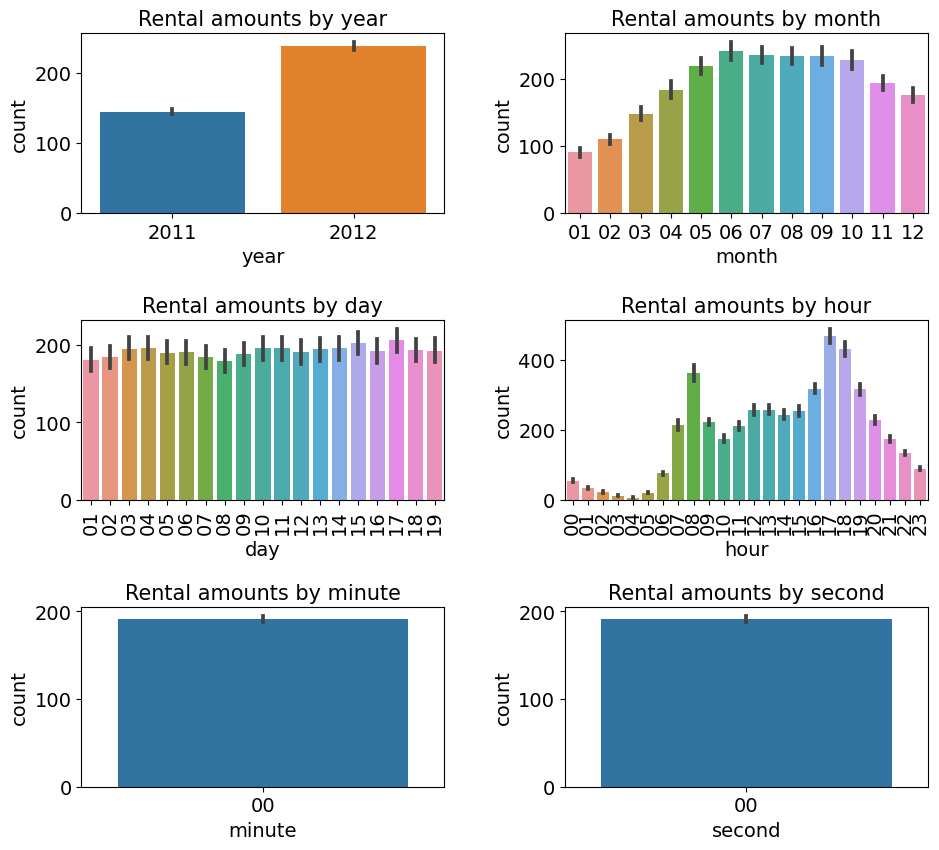

In [71]:
mpl.rc('font', size=14) # 폰트 크기 설정
mpl.rc('axes', titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성 ①
plt.tight_layout() # 그래프 사이에 여백 확보 ②
figure.set_size_inches(10, 9) # 전체 Figure 크기를 10x9인치로 설정 ③
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])
axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')
axes[2, 0].set(title='Rental amounts by minute')
axes[2, 1].set(title='Rental amounts by second')
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

피처로 사용하려면 훈련데이터와 테스트데이터에 공통된 값이 있어야 함   
day 피처 제거: 훈련데이터에만 존재(1-19),   
minute, second 피처 제거 : 정보없음

#### 박스플롯

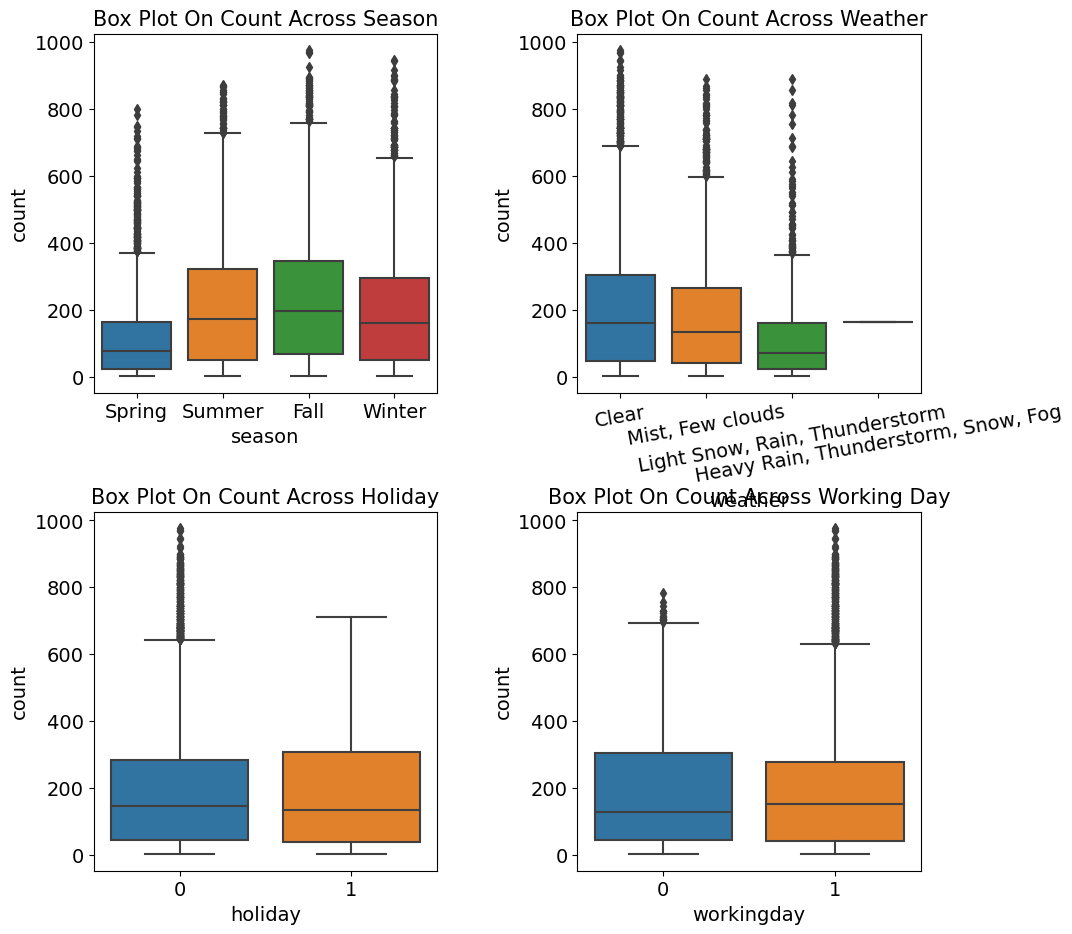

In [72]:
# 스텝 1 : m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(10, 10)

# 스텝 2 : 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯 ①
sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

# 3-2 : x축 라벨 겹침 해결
axes[0, 1].tick_params(axis='x', labelrotation=10) # 10도 회전

#### 포인트플롯

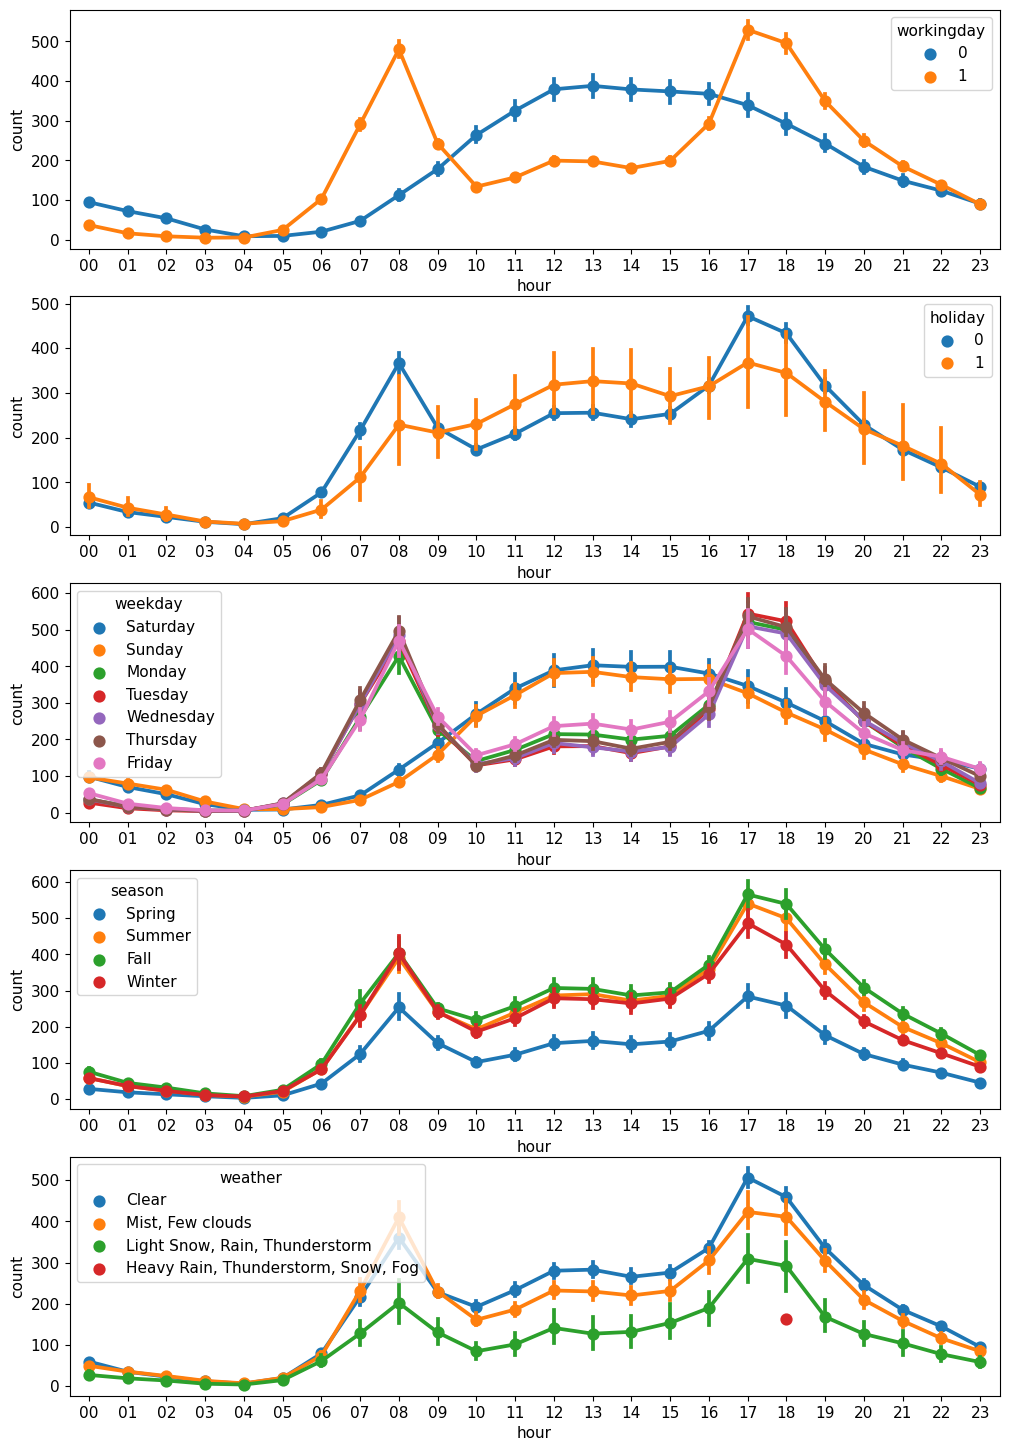

In [73]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5) # 5행 1열
figure.set_size_inches(12, 18)

# 스텝 2 : 서브플롯 할당
# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4]);

weather=4 제거?

#### 회귀선을 포함한 산점도 그래프

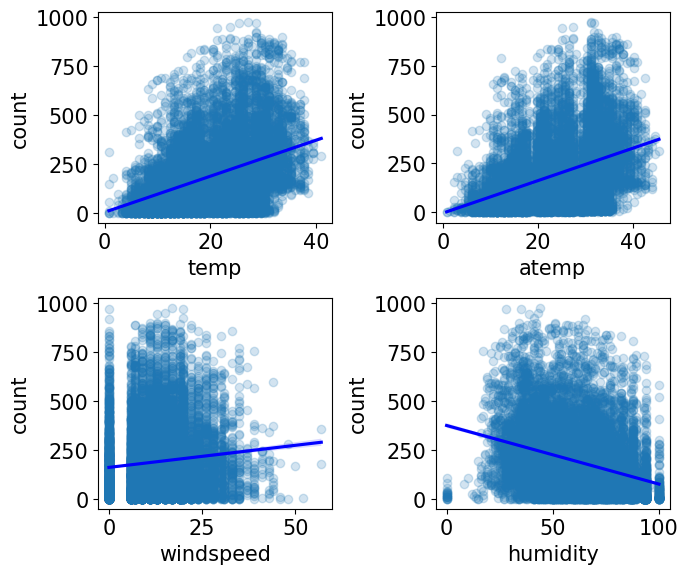

In [74]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(7, 6)

# 스텝 2 : 서브플롯 할당
# 온도, 체감 온도, 풍속, 습도 별 대여 수량 산점도 그래프
sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});

windspeed 피처제거 : 0 데이터 많음. 결측값이 많아서?

#### 히트맵

In [75]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


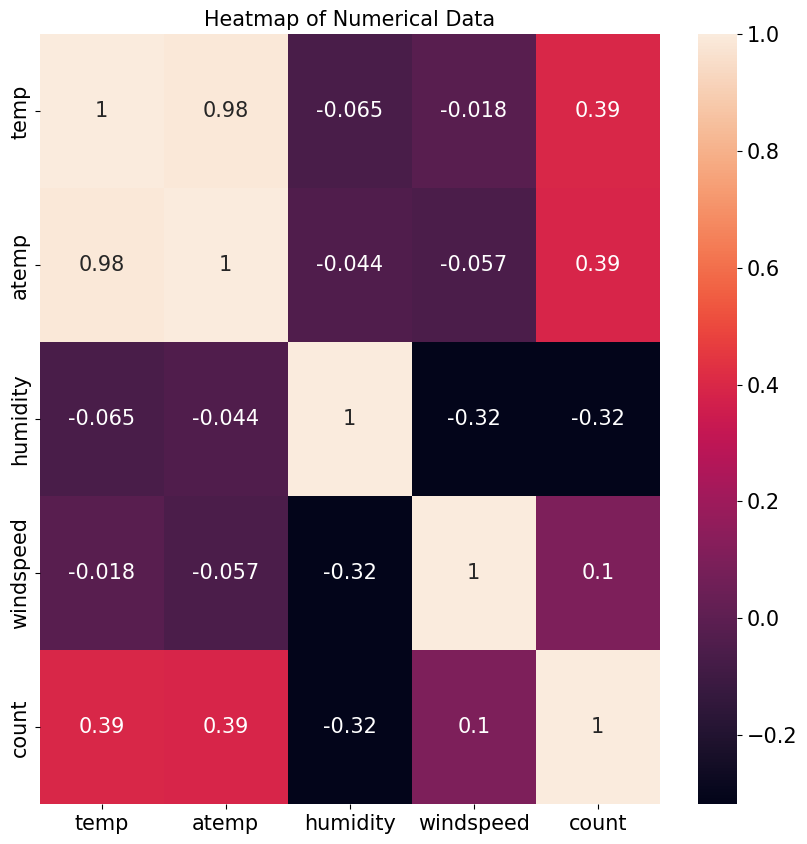

In [76]:
# 피처 간 상관관계 매트릭스 ①
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
fig, ax= plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True) # 상관관계 히트맵 그리기 ②
ax.set(title='Heatmap of Numerical Data');

분석 정리 및 모델링 전략
분석 정리

지금까지 다양한 측면에서 데이터를 살펴보았습니다. 분석 과정에서 파악한 주요 내용을 정리해보겠습니다.

1 타깃값 변환 : 분포도 확인 결과 타깃값인 count가 0 근처로 치우쳐 있으므로 로그변환하여 정규분포에 가깝게 만들어야 합니다. 타깃값을 count가 아닌 log(count)로 변환해 사용할 것이므로 마지막에 다시 지수변환해 count로 복원해야 합니다.

2 파생 피처 추가 : datetime 피처는 여러 가지 정보의 혼합체이므로 각각을 분리해 year, month, day, hour, minute, second 피처를 생성할 수 있습니다.

3 파생 피처 추가 : datetime에 숨어 있는 또 다른 정보인 요일(weekday) 피처를 추가하겠습니다.

4 피처 제거 : 테스트 데이터에 없는 피처는 훈련에 사용해도 큰 의미가 없습니다. 따라서 훈련 데이터에만 있는 casual과 registered 피처는 제거하겠습니다.

5 피처 제거 : datetime 피처는 인덱스 역할만 하므로 타깃값 예측에 아무런 도움이 되지 않습니다.

6 피처 제거 : date 피처가 제공하는 정보는 year, month, day 피처에 담겨 있습니다.

7 피처 제거 : month는 season 피처의 세부 분류로 볼 수 있습니다. 데이터가 지나치게 세분화되어 있으면 분류별 데이터 수가 적어서 오히려 학습에 방해가 되기도 힙니다.

8 피처 제거 : 막대 그래프 확인 결과 파생 피처인 day는 분별력이 없습니다.

9 피처 제거 : 막대 그래프 확인 결과 파생 피처인 minute와 second에는 아무런 정보가 담겨 있지 않습니다.

10 이상치 제거 : 포인트 플롯 확인 결과 weather가 4인 데이터는 이상치입니다.

11 피처 제거 : 산점도 그래프와 히트맵 확인 결과 windspeed 피처에는 결측값이 많고 대여 수량과의 상관관계가 매우 약합니다.

## 피처 엔지니어링

In [94]:
import numpy as np
import pandas as pd # 판다스 임포트
# 데이터 경로
data_path = "./Bike-Sharing-Demand/"

train = pd.read_csv(data_path + 'train.csv') # 훈련 데이터
test = pd.read_csv(data_path + 'test.csv') # 테스트 데이터
submission = pd.read_csv(data_path + 'samplesubmission.csv') # 제출 샘플 데이터

이상치 제거

In [95]:
# 훈련 데이터에서 weather가 4가 아닌 데이터만 추출
train = train[train['weather'] != 4]

데이터 합치기

In [96]:
all_data_temp = pd.concat([train, test])
all_data_temp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


인덱스문제 : 1-10885, 0-6492
원래 데이터의 인덱스를 무시하고 이어붙이려면 ignore_index=True를 전달

In [97]:
all_data = pd.concat([train, test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


파생 피처(변수) 추가

In [98]:
from datetime import datetime

# 날짜 피처 생성
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
# 연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
# 월 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
# 시 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
# 요일 피처 생성
all_data['weekday'] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())

훈련 데이터는 매달 1일부터 19일까지의 기록이고, 테스트 데이터는 매달 20일부터 월말까지의 기록. 그러므로 대여 수량을 예측할 때 일(day) 피처는 사용할 필요가 없음 minute와 second 피처도 모든 기록에서 값이 같으므로 예측에 사용할 필요가 없음

In [99]:
# datetime 타입으로 바꾸기
all_data['datetime'] = pd.to_datetime(all_data['datetime']) 

all_data['year'] = all_data['datetime'].dt.year # 연도
all_data['month'] = all_data['datetime'].dt.month # 월
all_data['hour'] = all_data['datetime'].dt.hour # 시간
all_data["weekday"] = all_data['datetime'].dt.weekday # 요일

필요 없는 피처 제거

casual과 registered피처는 테스트 데이터에 없는 피처이므로 제거(분석 정리 4). 
datetime 피처는 인덱스 역할이고, date 피처가 갖는 정보는 다른 피처들(year, month, day)에도 담겨 있기 때문에
datetime과 date 피처도 필요 없음(분석 정리 5, 6). season 피처가 month의 대분류 성격이라서 month 피처도 제거
(분석 정리 7). windspeed 피처도 타깃값과 상관관계가 약해서 제거(분석 정리 11)

In [100]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'month', 'windspeed']

all_data = all_data.drop(drop_features, axis=1)

데이터 나누기

In [101]:
# 훈련 데이터와 테스트 데이터 나누기 ①
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

# 타깃값 count 제거 ②
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count'] # 타깃값 ③

In [102]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,0,5
1,1,0,0,1,9.02,13.635,80,2011,1,5
2,1,0,0,1,9.02,13.635,80,2011,2,5
3,1,0,0,1,9.84,14.395,75,2011,3,5
4,1,0,0,1,9.84,14.395,75,2011,4,5


### 평가지표 계산 함수 작성

In [103]:
import numpy as np
def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환 ①
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)

     # 로그변환 후 결측값을 0으로 변환 ②
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))

     # RMSLE 계산 ③
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

### 모델 훈련

In [104]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [105]:
log_y = np.log(y) # 타깃값 로그변환
linear_reg_model.fit(X_train, log_y) # 모델 훈련

LinearRegression()

### 모델 성능검증

In [106]:
preds = linear_reg_model.predict(X_train) 

In [107]:
print (f'선형 회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

선형 회귀의 RMSLE 값 : 1.0205


In [108]:
linearreg_preds = linear_reg_model.predict(X_test) # 테스트 데이터로 예측

submission['count'] = np.exp(linearreg_preds) # 지수변환
submission.to_csv('./bike-sharing-demand/submission.csv', index=False) # 파일로 저장

### 성능 개선 I : 릿지 회귀 모델

In [109]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

In [110]:
# 하이퍼파라미터 값 목록 ①
ridge_params = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

# 교차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

# 그리드서치(with 릿지) 객체 생성 ②
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model, # 릿지 모델
                                      param_grid=ridge_params, # 값 목록
                                      scoring=rmsle_scorer, # 평가지표
                                      cv=5) # 교차 검증 분할 수

In [111]:
log_y = np.log(y) # 타깃값 로그변환
gridsearch_ridge_model.fit(X_train, log_y) # 훈련(그리드서치)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [112]:
print('최적 하이퍼파라미터 :', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.1, 'max_iter': 3000}


In [113]:
# 예측
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)

# 평가
print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}') 

릿지 회귀 RMSLE 값 : 1.0205


### 성능 개선 II : 라쏘 회귀 모델

In [114]:
from sklearn.linear_model import Lasso

# 모델 생성
lasso_model = Lasso()
# 하이퍼파라미터 값 목록
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}
# 그리드서치(with 라쏘) 객체 생성
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=5)
# 그리드서치 수행
log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.00125, 'max_iter': 3000}


In [115]:
# 예측
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

# 평가
print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

라쏘 회귀 RMSLE 값 : 1.0205


### 성능 개선 III : 랜덤 포레스트 회귀 모델

In [116]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
randomforest_model = RandomForestRegressor()
# 그리드서치 객체 생성
rf_params = {'random_state':[42], 'n_estimators':[100, 120, 140]} # ①
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid=rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5)
# 그리드서치 수행
log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)
print('최적 하이퍼파라미터 :', gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 140, 'random_state': 42}


In [117]:
# 예측
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

# 평가
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

랜덤 포레스트 회귀 RMSLE 값 : 0.1127


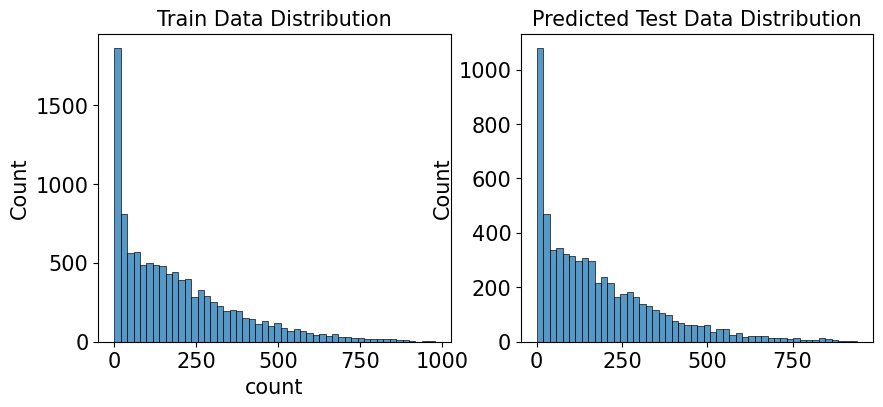

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution');

In [ ]:
submission['count'] = np.exp(randomforest_preds) # 지수변환
submission.to_csv('./bike-sharing-demand/submission1.csv', index=False)